In [28]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cpu'

In [29]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


#### 1 Prepare Data

In [30]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [31]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


#### 2 Define Model

Firstly, the code defines a subclass of nn.Module, which is a superclass that almost all PyTorch models inherit from.

The class constructor creates two nn.Linear layers with the capacity to handle the input and output shapes of the input features X and target labels y.

Next, the forward() method is defined, which contains the computations for the forward pass of the model.

Finally, an instance of the model class is created and sent to the designated device for computation.

In [32]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x


In [33]:
# Example usage:
model = Perceptron(2, 1)

#### 2.1 Chose appropriate optimizer

In [34]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

#### 2.2 Create Training Loop

In [35]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.4023
Epoch [200/4000], Loss: 0.2772
Epoch [300/4000], Loss: 0.2144
Epoch [400/4000], Loss: 0.1754
Epoch [500/4000], Loss: 0.1484
Epoch [600/4000], Loss: 0.1286
Epoch [700/4000], Loss: 0.1133
Epoch [800/4000], Loss: 0.1012
Epoch [900/4000], Loss: 0.0914
Epoch [1000/4000], Loss: 0.0833
Epoch [1100/4000], Loss: 0.0764
Epoch [1200/4000], Loss: 0.0706
Epoch [1300/4000], Loss: 0.0656
Epoch [1400/4000], Loss: 0.0612
Epoch [1500/4000], Loss: 0.0573
Epoch [1600/4000], Loss: 0.0539
Epoch [1700/4000], Loss: 0.0509
Epoch [1800/4000], Loss: 0.0482
Epoch [1900/4000], Loss: 0.0457
Epoch [2000/4000], Loss: 0.0435
Epoch [2100/4000], Loss: 0.0415
Epoch [2200/4000], Loss: 0.0397
Epoch [2300/4000], Loss: 0.0380
Epoch [2400/4000], Loss: 0.0364
Epoch [2500/4000], Loss: 0.0350
Epoch [2600/4000], Loss: 0.0337
Epoch [2700/4000], Loss: 0.0324
Epoch [2800/4000], Loss: 0.0313
Epoch [2900/4000], Loss: 0.0302
Epoch [3000/4000], Loss: 0.0292
Epoch [3100/4000], Loss: 0.0283
Epoch [3200/4000]

##### Create a function to plot our loss curve

In [36]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

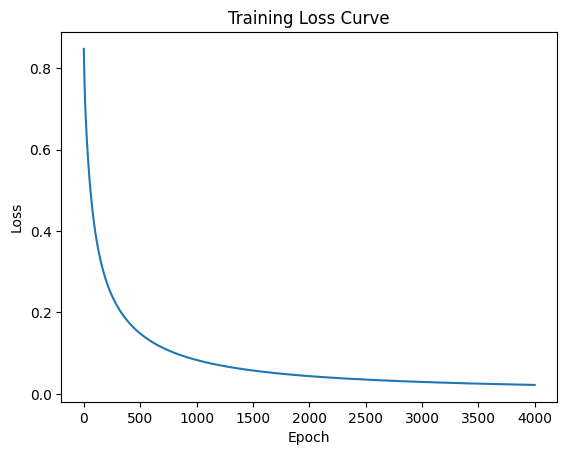

In [37]:
plot_loss(loss_values)

##### 4 Evaluate Your Model

In [38]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.5034e-05],
        [2.5392e-02],
        [2.5392e-02],
        [9.6443e-01]], grad_fn=<SigmoidBackward0>)


#### 5 Make necessary adjustments
In this case we don't understand exactly what e-01 e-02 values mean so we decide on a threshold and we 

In [39]:
output = (test_output > 0.5).float()

In [40]:
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


##### 6 Save the Model

In [41]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_perceptron.pth


In [42]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

### 1 Data

In [43]:
from sklearn.datasets import make_circles

# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [44]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [45]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
\Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


### Vizualize the dataset
Extra : Vary the noise to observe different dataset generation

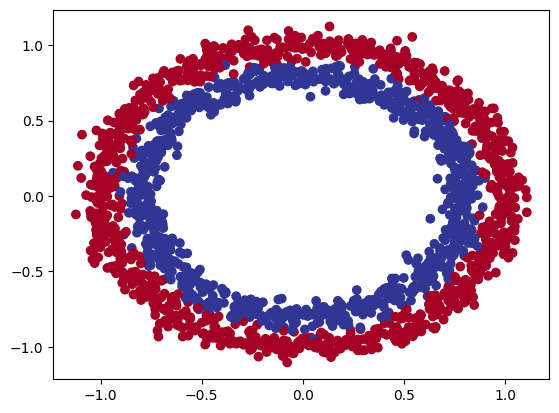

In [46]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

Ex 1

Analyse the data: print the shape of our toy dataset

What's the second dimension on X?

Print some values of the toy dataset


Ex 2 :

In the next step, we need to prepare the data to be compatible with PyTorch and for modelling. To achieve this, we have two tasks to complete:

Convert our data from NumPy arrays to PyTorch tensors as PyTorch works more efficiently with tensors.
Create a split between the training and testing sets. The model is trained on the training set to learn the relationships between X and y. Afterward, the model's learned patterns are evaluated on the test dataset.

In [47]:
from sklearn.model_selection import train_test_split
#Your code here

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible


### 2 Baseline (Dumb) Model

Ex 3 Build a model similar to the perceptron with 2 linear layers (no activation function)
Please be mindfull of your model names (distinct names)
If capable move your model to the gpu

In [48]:
class DataModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DataModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x


#### Equivalent of the circle model using nn sequential

In [49]:
model_circle = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_circle

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [50]:
# Ex 4 Create the recommended loss_fn and optimizer

In [51]:
import torch.nn as nn
import torch.optim as optim

# create loss function
loss_fn = nn.MSELoss()

# create optimizer
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [52]:
# 3 Evaluate Model

In [53]:
from utils import plot_decision_boundary

### 2.2 Training Loop

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



In [54]:
# Ex 5 Build the training loop
# Every 10 epochs rint the loss and the accuracy and save them in a loss_curve, acc_curve
# Also plot them

Epoch 10/50, Loss: 0.1623, Accuracy: 100.00%
Epoch 20/50, Loss: 0.0956, Accuracy: 100.00%
Epoch 30/50, Loss: 0.0395, Accuracy: 100.00%
Epoch 40/50, Loss: 0.0111, Accuracy: 100.00%
Epoch 50/50, Loss: 0.0023, Accuracy: 100.00%


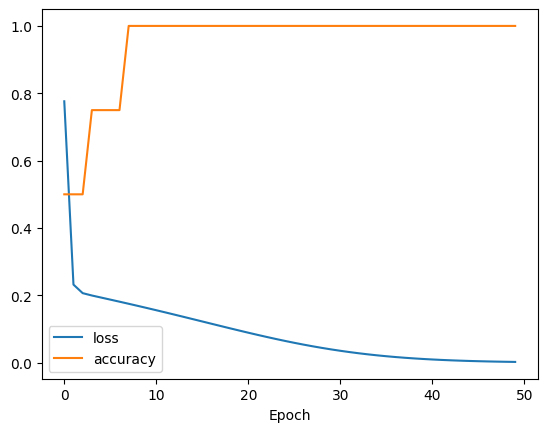

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# define the model class
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LinearModel, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return x

# define training data
X_train = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0], [0], [1], [1]], dtype=torch.float32)

# define model dimensions
input_dim = X_train.shape[1]
hidden_dim = 4
output_dim = y_train.shape[1]

# create model instance
model = LinearModel(input_dim, hidden_dim, output_dim)

# move model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()
    X_train = X_train.cuda()
    y_train = y_train.cuda()

# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# define training loop
num_epochs = 50
loss_curve = []
acc_curve = []
for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # calculate accuracy
    y_pred_class = torch.round(y_pred)
    accuracy = torch.mean((y_pred_class == y_train).float())

    # save loss and accuracy
    loss_curve.append(loss.item())
    acc_curve.append(accuracy.item())

    # print loss and accuracy every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%")

# plot loss and accuracy curves
plt.plot(loss_curve, label="loss")
plt.plot(acc_curve, label="accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()


### 3 Evaluate plots

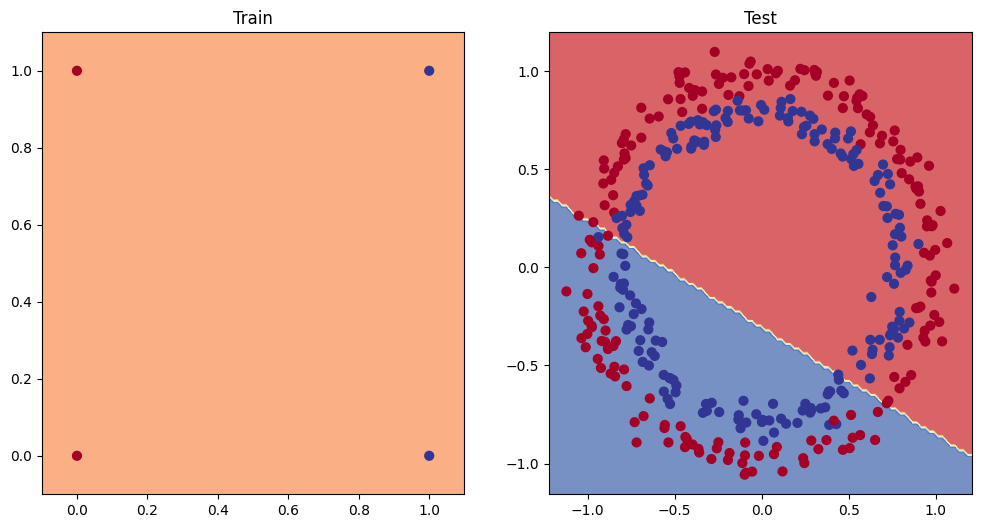

In [70]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

In [57]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [58]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

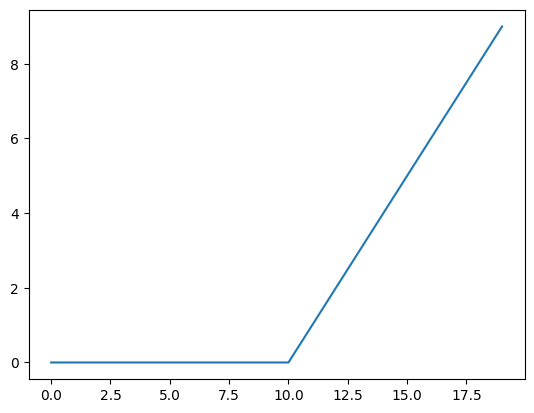

In [59]:
plt.plot(relu(input_dummy))

In [60]:
# Ex 6 Recreate the model with some none linear activation functions

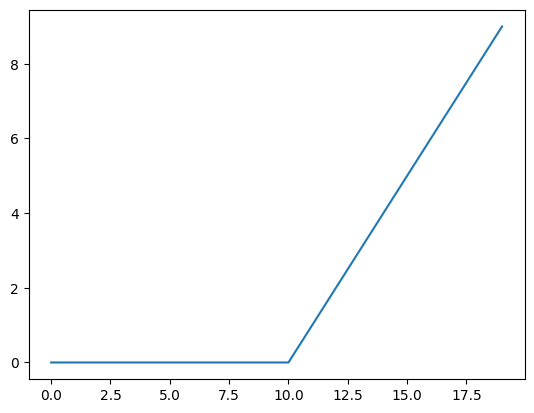

In [61]:
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

def relu(x):
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

def leaky_relu(x):
    return torch.maximum(0.1*x, x)

# Pass toy tensor through ReLU function
relu(input_dummy)

plt.plot(relu(input_dummy))


In [62]:
# Ex 7 Recreate the optimizer and training loop

Epoch 10/50, Loss: 0.1987, Accuracy: 75.00%
Epoch 20/50, Loss: 0.1250, Accuracy: 100.00%
Epoch 30/50, Loss: 0.0595, Accuracy: 100.00%
Epoch 40/50, Loss: 0.0195, Accuracy: 100.00%
Epoch 50/50, Loss: 0.0046, Accuracy: 100.00%


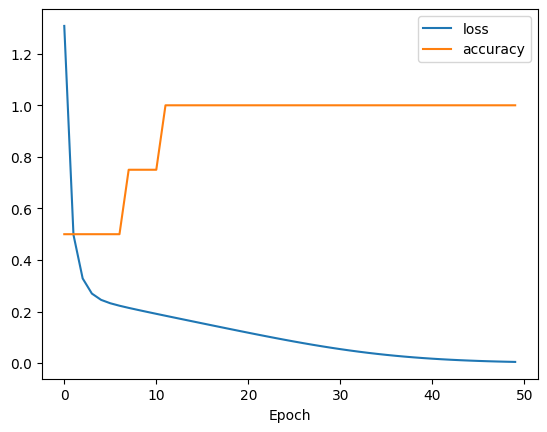

In [63]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LinearModel, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.hidden(x)
        x = self.output(x)
        return x
    
# define training data
X_train = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0], [0], [1], [1]], dtype=torch.float32)

# define model dimensions
input_dim = X_train.shape[1]
hidden_dim = 4
output_dim = y_train.shape[1]

# create model instance
model = LinearModel(input_dim, hidden_dim, output_dim)

# move model to GPU if available
if torch.cuda.is_available():
    model = model.cuda()
    X_train = X_train.cuda()
    y_train = y_train.cuda()

# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# define training loop
num_epochs = 50
loss_curve = []
acc_curve = []

for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # calculate accuracy
    y_pred_class = torch.round(y_pred)
    accuracy = torch.mean((y_pred_class == y_train).float())

    # save loss and accuracy
    loss_curve.append(loss.item())
    acc_curve.append(accuracy.item())

    # print loss and accuracy every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%")

# plot loss and accuracy curves
plt.plot(loss_curve, label="loss")
plt.plot(acc_curve, label="accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [64]:
# Ex 8 Evaluate vizual

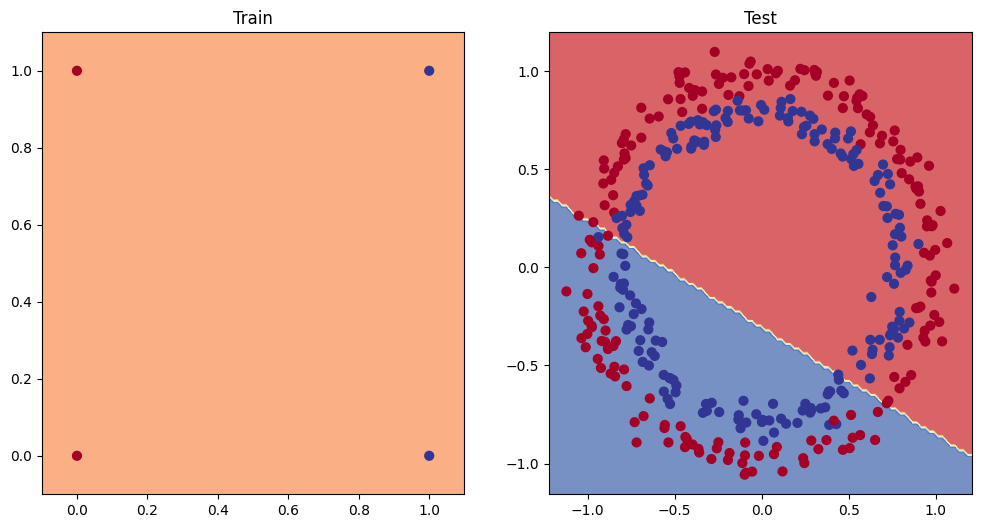

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


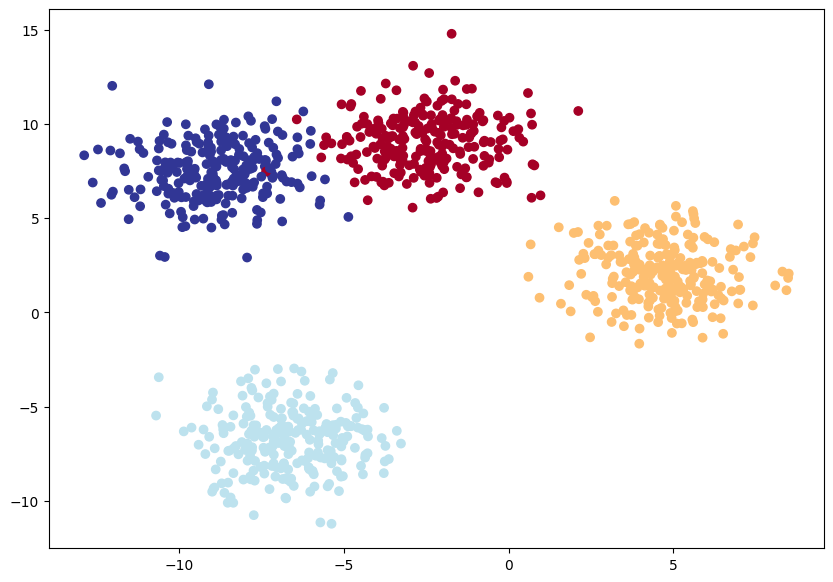

In [66]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [67]:
# Ex 9 (For grade 10): Create a pytorch flow to do multi class classification as instructed in the previos examples

# Tip since the data presents itself as a having liniar relationships no relu/sigmoid activation are required.
